In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import point


In [6]:
dd_dat = pd.read_csv('doordash_data.csv')

In [7]:
clean_dd = dd_dat.drop(['city_slug', 'delivery_fee_raw', 'delivery_fee', 'service_fee_raw', 'service_fee', 'phone', 'RunDate', 'delivery_time_raw'], axis=1)

In [8]:
clean_dd['cuisines split'] = clean_dd['cuisines'].str.split('|')
clean_dd.head(2)

,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,latitude,longitude,distance,loc_name,loc_number,url,address,cuisines,delivery_time,review_count,review_rating,cuisines split
0,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8,"[Vietnamese, Bubble Tea, Smoothies, Sandwiches..."
1,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8,"[Vietnamese, Bubble Tea, Smoothies, Sandwiches..."


In [9]:
cleaner_dd = clean_dd.drop_duplicates(subset=['loc_name', 'latitude', 'longitude'], keep='last')

In [10]:
# Count of orders by metro area - New York City, Chicago, Los Angeles, Boston --> Shows 4 markets analyzed
cleaner_dd['searched_metro'].value_counts()

NY    1620
LA     875
CH     848
BO     730
Name: searched_metro, dtype: int64

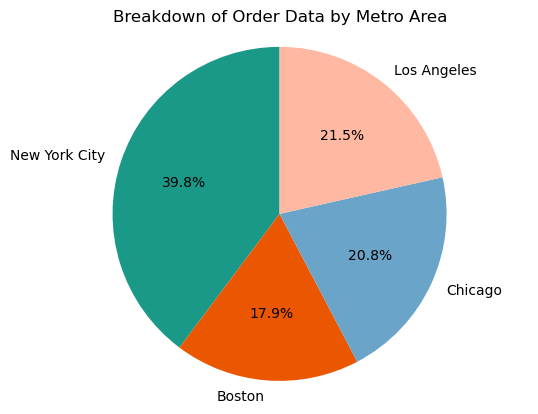

<Figure size 640x480 with 0 Axes>

In [37]:
# Pie plot showing the distribution orders per city
markets = ["New York City", "Boston", "Chicago", "Los Angeles"]
orders = [1620, 730, 848, 875]
colors = ["#1a9988", "#eb5600", "#6aa4c8", "#ffb8a2"]

plt.title("Breakdown of Order Data by Metro Area")
plt.pie(orders, labels=markets, colors=colors, autopct="%1.1f%%", startangle=90)

plt.axis("equal")
plt.show()
plt.savefig("OrdersbyMarket.jpg")

In [12]:
#ALL markets

#refining definition for cuisine
int_cuisines = ['Indian', 
'Italian', 
'Japanese',
'Mexican',
'Thai', 
'Chinese', 
'French',
'Turkish',
'Greek',
'Arab',
'Spanish',
'Vietnamese',
'Korean',
'Malaysian',
'Russian',
'Ethiopian',
'Caribbean',
'African', 
'American']

all_cuisine_types= cleaner_dd['cuisines split'].explode()


all_cuisine_types = all_cuisine_types.reset_index()
all_cuisine_types = all_cuisine_types.drop(columns='index')
all_cuisine_types

# all_cuisine_types.values
dd_cuisines = {'cuisine': all_cuisine_types['cuisines split'].value_counts().index, 'count': all_cuisine_types['cuisines split'].value_counts().values}
dd_cuisines = pd.DataFrame(dd_cuisines)
dd_final = dd_cuisines[dd_cuisines['cuisine'].isin(int_cuisines)]
dd_final

,cuisine,count
7,Mexican,434
12,American,312
13,Italian,299
24,Japanese,175
27,Chinese,151
45,Thai,93
61,Indian,67
92,Caribbean,39
95,Korean,37
97,Vietnamese,37


In [13]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+2, y[i], ha ='center', fontsize=15)

In [14]:
list(dd_final["count"])

[434, 312, 299, 175, 151, 93, 67, 39, 37, 37, 26, 12, 9, 9, 6, 5, 2, 1]

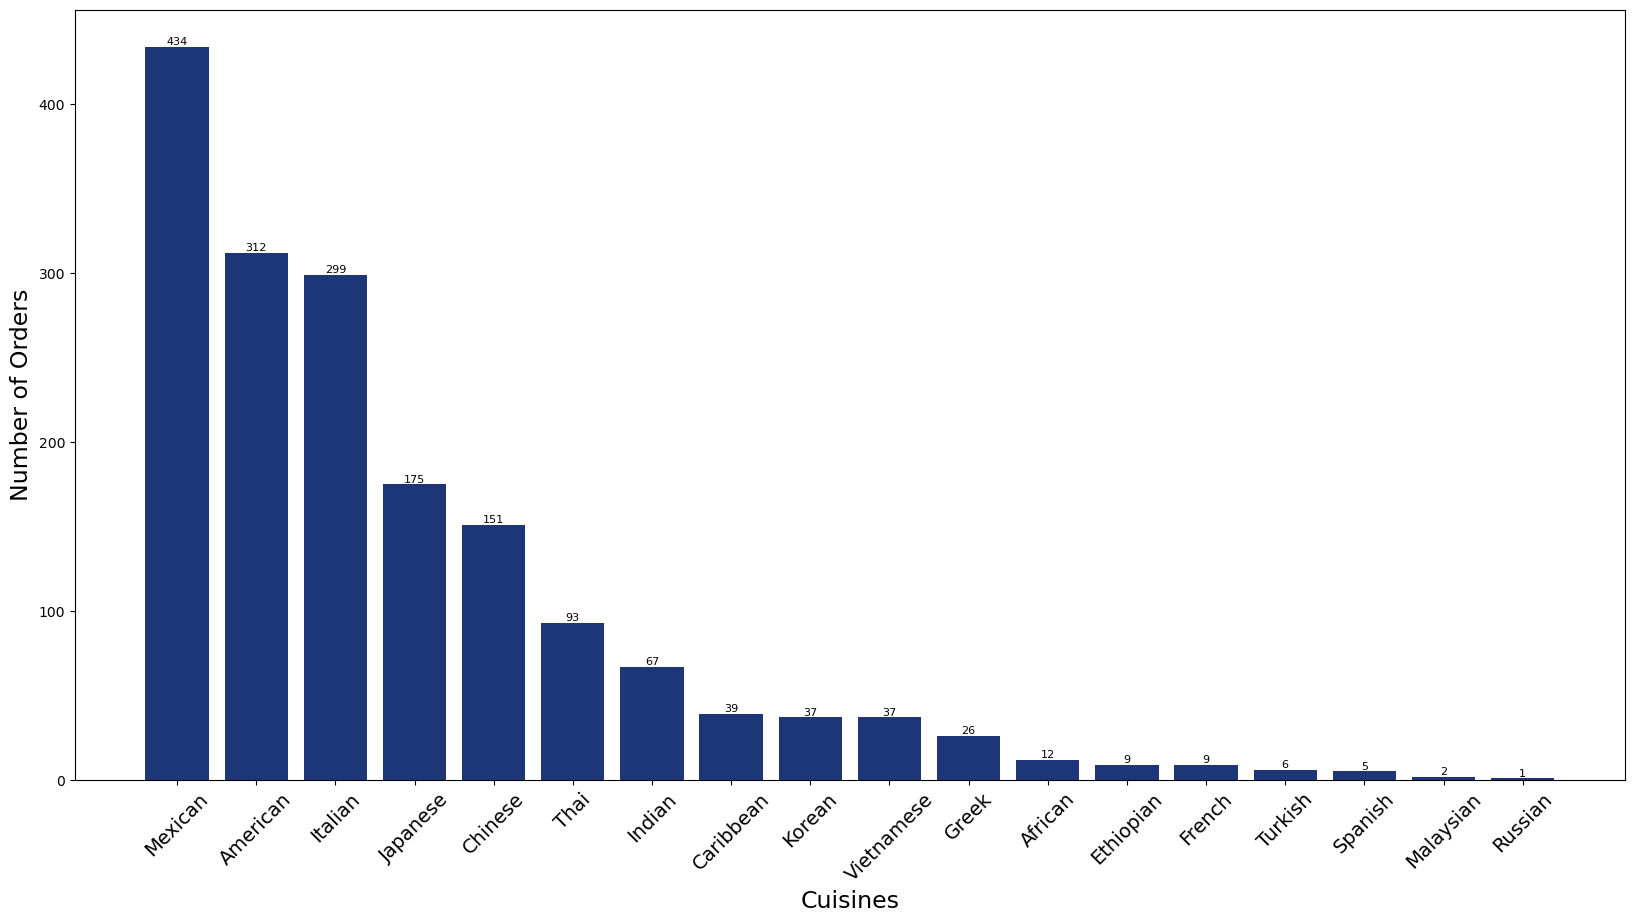

In [36]:
#def addlabels(x,y):
#    for i in range(len(x)):
#        plt.text(i, y[i], y[i], ha ='center')


x_axis = list(np.arange(len(dd_final)))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,10))
plt.bar(x_axis, dd_final["count"], color="#1c3678", align="center")
addlabels(x_axis, list(dd_final["count"]))
plt.xticks(tick_locations, dd_final["cuisine"], rotation=45, fontsize=14)
#plt.title("Popularity of Cuisines for Door Dash Orders", fontsize=20, weight='bold')      
plt.xlabel('Cuisines', fontsize=17)
plt.ylabel('Number of Orders', fontsize=17)
plt.savefig("DataSetTopCuisines.jpg")

In [16]:
#NY market


#refining definition for cuisine
int_cuisines = ['Indian', 
'Italian', 
'Japanese',
'Mexican',
'Thai', 
'Chinese', 
'French',
'Turkish',
'Greek',
'Arab',
'Spanish',
'Vietnamese',
'Korean',
'Malaysian',
'Russian',
'Ethiopian',
'Caribbean',
'African', 
'American']

NY = cleaner_dd['searched_metro'] == 'NY'

NY_temp = cleaner_dd['cuisines split'].where(NY)
NY_temp = NY_temp.explode().dropna()
NY_temp.value_counts()

NY_cuisine_types = NY_temp.reset_index()
NY_cuisine_types = NY_cuisine_types.drop(columns='index')
NY_cuisine_types

# all_cuisine_types.values
NY_cuisines = {'cuisine': NY_cuisine_types['cuisines split'].value_counts().index, 'count': NY_cuisine_types['cuisines split'].value_counts().values}
NY_cuisines = pd.DataFrame(NY_cuisines)
final_NY = NY_cuisines[NY_cuisines['cuisine'].isin(int_cuisines)]
final_NY

,cuisine,count
9,American,141
10,Mexican,119
14,Italian,106
29,Chinese,54
39,Japanese,45
45,Indian,37
46,Caribbean,36
50,Thai,30
94,Korean,14
147,Vietnamese,7


In [17]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1, y[i], ha ='center', fontsize=8)


In [18]:
list(final_NY["count"])

[141, 119, 106, 54, 45, 37, 36, 30, 14, 7, 7, 6, 5, 4, 3, 3, 1]

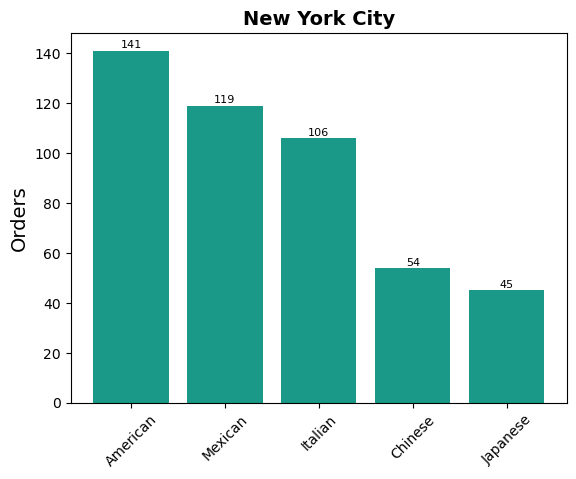

In [35]:
NYcuisine = ['American', 'Mexican', 'Italian', 'Chinese', 'Japanese']
NYorders = [141,119,106,54,45]

x_axis = np.arange(len(NYcuisine))
tick_locations = [value for value in x_axis]

#plt.figure(figsize=(20,10))
plt.bar(x_axis, NYorders, color="#1a9988", align="center")
plt.xticks(tick_locations, NYcuisine, rotation=45, fontsize=10)
addlabels(x_axis, list(final_NY["count"]))
plt.title("New York City", fontsize=14, weight='bold')      
#plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Orders', fontsize=14)
plt.savefig("NYCTopCuisines.jpg")

In [20]:
#Chicago markets

#refining definition for cuisine
int_cuisines = ['Indian', 
'Italian', 
'Japanese',
'Mexican',
'Thai', 
'Chinese', 
'French',
'Turkish',
'Greek',
'Arab',
'Spanish',
'Vietnamese',
'Korean',
'Malaysian',
'Russian',
'Ethiopian',
'Caribbean',
'African', 
'American']

CH = cleaner_dd['searched_metro'] == 'CH'

CH_temp = cleaner_dd['cuisines split'].where(CH)
CH_temp = CH_temp.explode().dropna()
CH_temp.value_counts()

CH_cuisine_types = CH_temp.reset_index()
CH_cuisine_types = CH_cuisine_types.drop(columns='index')
CH_cuisine_types

# all_cuisine_types.values
CH_cuisines = {'cuisine': CH_cuisine_types['cuisines split'].value_counts().index, 'count': CH_cuisine_types['cuisines split'].value_counts().values}
CH_cuisines = pd.DataFrame(CH_cuisines)
final_CH = CH_cuisines[CH_cuisines['cuisine'].isin(int_cuisines)]
final_CH

,cuisine,count
6,Mexican,99
12,American,69
13,Italian,69
21,Thai,38
25,Japanese,33
39,Chinese,25
69,Vietnamese,12
84,Indian,9
115,Greek,6
116,Korean,6


In [21]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1, y[i], ha ='center', fontsize=8)


In [22]:
list(final_CH["count"])

[99, 69, 69, 38, 33, 25, 12, 9, 6, 6, 5, 4, 2, 1, 1, 1, 1]

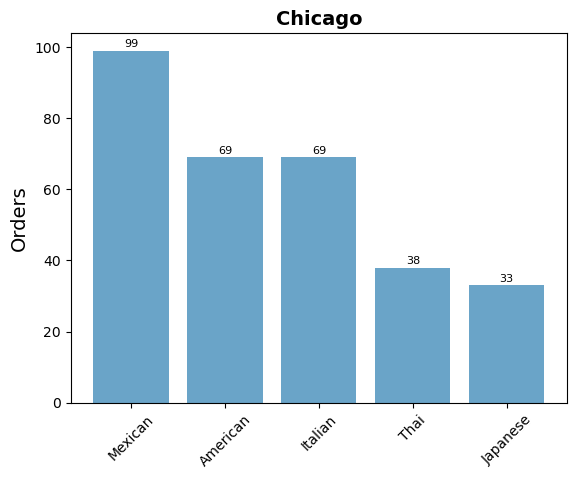

In [34]:
CHcuisine = ['Mexican', 'American', 'Italian', 'Thai', 'Japanese']
CHorders = [99,69,69,38,33]

x_axis = np.arange(len(CHcuisine))
tick_locations = [value for value in x_axis]

#plt.figure(figsize=(20,10))
plt.bar(x_axis, CHorders, color="#6aa4c8", align="center")
plt.xticks(tick_locations, CHcuisine, rotation=45, fontsize=10)
addlabels(x_axis, list(final_CH["count"]))
plt.title("Chicago", fontsize=14, weight='bold')      
#plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Orders', fontsize=14)
plt.savefig("ChicagoTopCuisines.jpg")

In [24]:
#Boston market

#refining definition for cuisine
int_cuisines = ['Indian', 
'Italian', 
'Japanese',
'Mexican',
'Thai', 
'Chinese', 
'French',
'Turkish',
'Greek',
'Arab',
'Spanish',
'Vietnamese',
'Korean',
'Malaysian',
'Russian',
'Ethiopian',
'Caribbean',
'African', 
'American']

BO = cleaner_dd['searched_metro'] == 'BO'

BO_temp = cleaner_dd['cuisines split'].where(BO)
BO_temp = BO_temp.explode().dropna()
BO_temp.value_counts()

BO_cuisine_types = BO_temp.reset_index()
BO_cuisine_types = BO_cuisine_types.drop(columns='index')
BO_cuisine_types

# all_cuisine_types.values
BO_cuisines = {'cuisine': BO_cuisine_types['cuisines split'].value_counts().index, 'count': BO_cuisine_types['cuisines split'].value_counts().values}
BO_cuisines = pd.DataFrame(BO_cuisines)
final_BO = BO_cuisines[BO_cuisines['cuisine'].isin(int_cuisines)]
final_BO


,cuisine,count
6,Italian,84
11,Mexican,64
12,American,50
19,Japanese,38
28,Chinese,28
65,Indian,12
67,Thai,11
73,Greek,10
92,Vietnamese,6
160,Korean,3


In [25]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1, y[i], ha ='center', fontsize=8)


In [26]:
list(final_BO["count"])

[84, 64, 50, 38, 28, 12, 11, 10, 6, 3, 2, 1, 1]

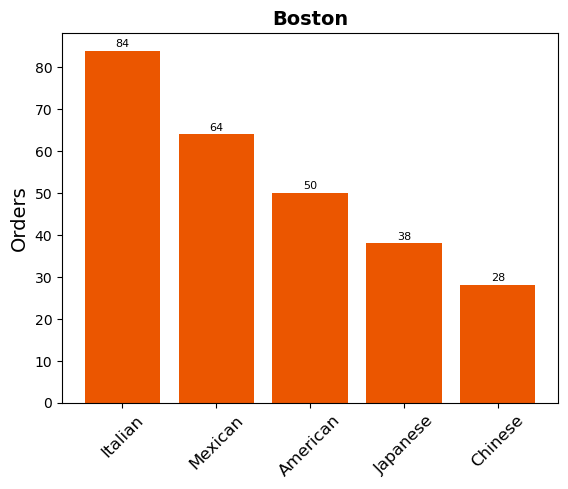

In [33]:
BOcuisine = ['Italian', 'Mexican', 'American', 'Japanese', 'Chinese']
BOorders = [84,64,50,38,28]

x_axis = np.arange(len(BOcuisine))
tick_locations = [value for value in x_axis]

#plt.figure(figsize=(20,10))
plt.bar(x_axis, BOorders, color="#eb5600", align="center")
plt.xticks(tick_locations, BOcuisine, rotation=45, fontsize=12)
addlabels(x_axis, list(final_BO["count"]))
plt.title("Boston", fontsize=14, weight='bold')      
#plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Orders', fontsize=14)
plt.savefig("BostonTopCuisines.jpg")

In [28]:
#LA Market

#refining definition for cuisine
int_cuisines = ['Indian', 
'Italian', 
'Japanese',
'Mexican',
'Thai', 
'Chinese', 
'French',
'Turkish',
'Greek',
'Arab',
'Spanish',
'Vietnamese',
'Korean',
'Malaysian',
'Russian',
'Ethiopian',
'Caribbean',
'African', 
'American']

LA = cleaner_dd['searched_metro'] == 'LA'

LA_temp = cleaner_dd['cuisines split'].where(LA)
LA_temp = LA_temp.explode().dropna()
LA_temp.value_counts()

LA_cuisine_types = LA_temp.reset_index()
LA_cuisine_types = LA_cuisine_types.drop(columns='index')
LA_cuisine_types

# all_cuisine_types.values
LA_cuisines = {'cuisine': LA_cuisine_types['cuisines split'].value_counts().index, 'count': LA_cuisine_types['cuisines split'].value_counts().values}
LA_cuisines = pd.DataFrame(LA_cuisines)
final_LA = LA_cuisines[LA_cuisines['cuisine'].isin(int_cuisines)]
final_LA

,cuisine,count
3,Mexican,152
17,Japanese,59
19,American,52
24,Chinese,44
28,Italian,40
65,Korean,14
66,Thai,14
78,Vietnamese,12
85,Indian,9
162,Greek,4


In [29]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1, y[i], ha ='center', fontsize=8)

In [30]:
list(final_LA["count"])

[152, 59, 52, 44, 40, 14, 14, 12, 9, 4, 2, 1, 1, 1]

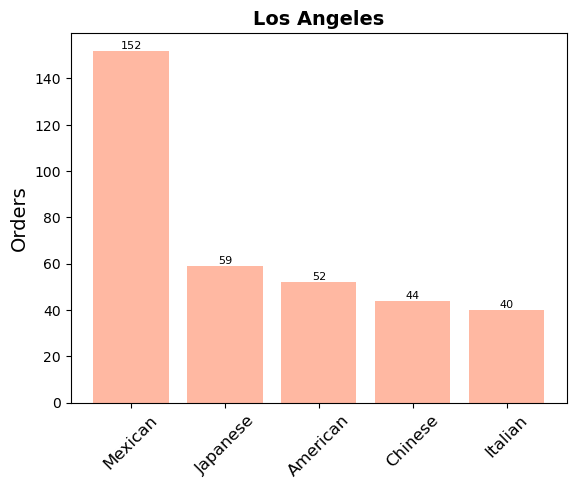

In [32]:
LAcuisine = ['Mexican', 'Japanese','American','Chinese', 'Italian']
LAorders = [152,59,52,44,40]

x_axis = np.arange(len(LAcuisine))
tick_locations = [value for value in x_axis]

#plt.figure(figsize=(20,10))
plt.bar(x_axis, LAorders, color="#ffb8a2", align="center")
plt.xticks(tick_locations, LAcuisine, rotation=45, fontsize=12)
addlabels(x_axis, list(final_LA["count"]))
plt.title("Los Angeles", fontsize=14, weight='bold')      
#plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Orders', fontsize=14)
plt.savefig("LATopCuisines.jpg")